In [1]:
import numpy as np
import cvxpy as cp
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython import display

from agents import DT_Kin_Bike_Agent
from LTV_FTOCP import LTV_FTOCP

In [2]:
# model_dt = 0.01
# control_dt = 0.05

model_dt = 0.1
control_dt = 0.1

n_control = int(np.around(control_dt/model_dt))

x_0 = np.array([0.0, -6.0, 0.0, 0.0])
x_f = np.array([0.0, 6.0, 3.0*np.pi/4.0, 0.0])

waypts = [np.array([5.0, 0.0, np.pi/2.0, 1.0])]
# waypts = []
waypts.append(x_f)

l_r = 0.5
l_f = 0.5
w = 0.5

Q = np.diag([15.0, 15.0, 20.0, 25.0])
R = np.diag([1.0, 10.0])
Rd = 0.1*np.eye(2)
P = Q
N = 15

dyn_agent = DT_Kin_Bike_Agent(l_r, l_f, w, model_dt, x_0)
ctr_agent = DT_Kin_Bike_Agent(l_r, l_f, w, control_dt, x_0)

# fhocp = InitFTOCP(Q, P, R, Rd, N, dyn_agent, x_refs=waypts)
ftocp = LTV_FTOCP(Q, P, R, Rd, N, ctr_agent, x_refs=waypts)
waypt_idx = ftocp.get_reference_idx()

In [3]:
x_traj = [x_0]
u_traj = []

x_t = np.squeeze(x_0)
t = 0
t_span = [0]

counter = 0

# for i in range(1000):
while True:
#     print(i)
    
    t_span.append(t)
    
    if np.mod(counter, n_control) == 0:
        x_pred, u_pred = ftocp.solve(x_t, t, verbose=False)
        u_t = u_pred[:,0]
        print('t: %g, d: %g, x: %g, y: %g, phi: %g, v: %g' % (t, la.norm(x_t[:2] - waypts[waypt_idx][:2]), x_t[0], x_t[1], x_t[2]*180.0/np.pi, x_t[3]))
#         print(x_pred)
    
    x_tp1 = dyn_agent.sim(x_t, u_t)
    
    x_traj.append(x_tp1)
    u_traj.append(u_t)
    
    d = la.norm(x_tp1[:2] - waypts[waypt_idx][:2])
    v = x_tp1[3] - waypts[waypt_idx][3]
    if d <= 0.5 and waypt_idx < len(waypts)-1:
        print('Waypoint %i reached' % waypt_idx)
        ftocp.advance_reference_idx()
        waypt_idx = ftocp.get_reference_idx()
    elif d <= 0.5 and v <= 0.1 and waypt_idx == len(waypts)-1:
        print('Goal state reached')
        break
            
    t += model_dt
    counter += 1
    x_t = x_tp1

x_traj = np.array(x_traj)
u_traj = np.array(u_traj)

t: 0, d: 7.81025, x: 0, y: -6, phi: 0, v: 0
t: 0.1, d: 7.81025, x: 0, y: -6, phi: 0, v: 0.0300085
t: 0.2, d: 7.80833, x: 0.00300085, y: -6, phi: 0.00023781, v: 0.0900281
t: 0.3, d: 7.80245, x: 0.0120024, y: -5.99985, phi: 0.008691, v: 0.180048
t: 0.4, d: 7.79052, x: 0.0299982, y: -5.99928, phi: 0.0410917, v: 0.280048
t: 0.5, d: 7.77169, x: 0.0579718, y: -5.99796, phi: 0.115649, v: 0.380048
t: 0.6, d: 7.74576, x: 0.0958997, y: -5.99554, phi: 0.249731, v: 0.480048
t: 0.7, d: 7.71253, x: 0.143746, y: -5.99165, phi: 0.460823, v: 0.580048
t: 0.8, d: 7.67179, x: 0.20146, y: -5.98585, phi: 0.766578, v: 0.680048
t: 0.9, d: 7.62331, x: 0.268968, y: -5.97764, phi: 1.18493, v: 0.780048
t: 1, d: 7.56682, x: 0.346167, y: -5.96646, phi: 1.73414, v: 0.880048
t: 1.1, d: 7.50202, x: 0.432914, y: -5.95164, phi: 2.43262, v: 0.980048
t: 1.2, d: 7.42854, x: 0.529016, y: -5.93241, phi: 3.29923, v: 1.08005
t: 1.3, d: 7.346, x: 0.634208, y: -5.90793, phi: 4.3531, v: 1.18005
t: 1.4, d: 7.25394, x: 0.748138, y:

t: 11.8, d: 0.675154, x: 0.652356, y: 5.82603, phi: 143.678, v: 0.335017
t: 11.9, d: 0.644576, x: 0.626123, y: 5.84687, phi: 143.607, v: 0.317579
t: 12, d: 0.61578, x: 0.601125, y: 5.86646, phi: 143.553, v: 0.300952
t: 12.1, d: 0.588935, x: 0.577657, y: 5.8853, phi: 143.484, v: 0.285167
t: 12.2, d: 0.563755, x: 0.55536, y: 5.90308, phi: 143.425, v: 0.270154
t: 12.3, d: 0.540275, x: 0.534322, y: 5.92002, phi: 143.363, v: 0.255902
t: 12.4, d: 0.518358, x: 0.514403, y: 5.93609, phi: 143.306, v: 0.242359
t: 12.5, d: 0.497951, x: 0.495568, y: 5.95134, phi: 143.25, v: 0.229502
t: 12.6, d: 0.478971, x: 0.477748, y: 5.9658, phi: 143.197, v: 0.217295
t: 12.7, d: 0.461347, x: 0.460892, y: 5.97952, phi: 143.147, v: 0.205711
t: 12.8, d: 0.445007, x: 0.444944, y: 5.99251, phi: 143.099, v: 0.194721
t: 12.9, d: 0.429882, x: 0.429855, y: 6.00482, phi: 143.054, v: 0.184296
t: 13, d: 0.415907, x: 0.41558, y: 6.01647, phi: 143.012, v: 0.17441
t: 13.1, d: 0.403014, x: 0.402074, y: 6.02751, phi: 142.972, v

Text(0,0.5,u'a')

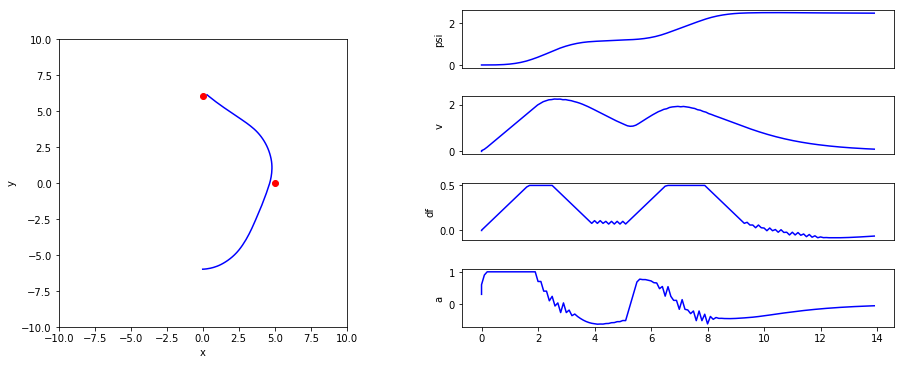

In [4]:
fig = plt.figure()

xy_ax = fig.add_axes([0, 0, 1, 1])
psi_ax = fig.add_axes([1.1, 0.9, 1, 0.2])
psi_ax.set_xticks([])
v_ax = fig.add_axes([1.1, 0.6, 1, 0.2])
v_ax.set_xticks([])
df_ax = fig.add_axes([1.1, 0.3, 1, 0.2])
df_ax.set_xticks([])
a_ax = fig.add_axes([1.1, 0.0, 1, 0.2])

xy_ax.plot(x_traj[:,0], x_traj[:,1], 'b-')
xy_ax.set_xlabel('x')
xy_ax.set_ylabel('y')
xy_ax.set_xlim([-10, 10])
xy_ax.set_ylim([-10, 10])
xy_ax.set_aspect('equal')    
for j in range(len(waypts)):
    xy_ax.plot(waypts[j][0], waypts[j][1], 'ro')

psi_ax.plot(t_span, x_traj[:,2], 'b-')
psi_ax.set_ylabel('psi')

v_ax.plot(t_span, x_traj[:,3], 'b-')
v_ax.set_ylabel('v')

df_ax.plot(t_span[:-1], u_traj[:,0], 'b-')
df_ax.set_ylabel('df')

a_ax.plot(t_span[:-1], u_traj[:,1], 'b-')
a_ax.set_ylabel('a')

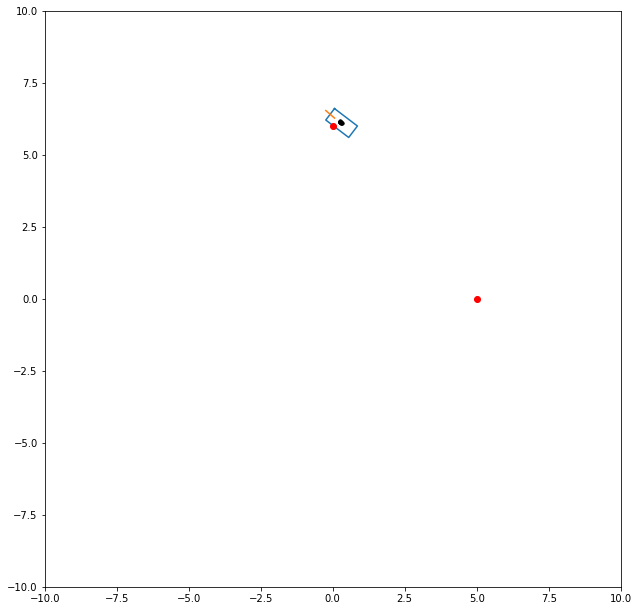

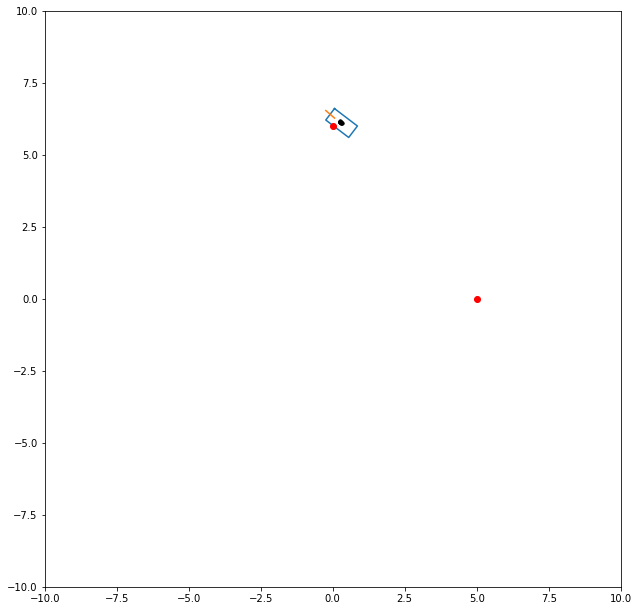

In [6]:
f = plt.figure()
ax = f.add_axes([0, 0, 2, 2])
control_counter = -1

for i in range(0,u_traj.shape[0],n_control):
#     print(i)
    
    ax.clear()
    
    x_t = x_traj[i,:]
    u_t = u_traj[i,:]
    
    car_x = [x_t[0] + l_f*np.cos(x_t[2]) + w*np.sin(x_t[2])/2, 
            x_t[0] + l_f*np.cos(x_t[2]) - w*np.sin(x_t[2])/2,
            x_t[0] - l_r*np.cos(x_t[2]) - w*np.sin(x_t[2])/2,
            x_t[0] - l_r*np.cos(x_t[2]) + w*np.sin(x_t[2])/2,
            x_t[0] + l_f*np.cos(x_t[2]) + w*np.sin(x_t[2])/2]
    car_y = [x_t[1] + l_f*np.sin(x_t[2]) - w*np.cos(x_t[2])/2, 
            x_t[1] + l_f*np.sin(x_t[2]) + w*np.cos(x_t[2])/2,
            x_t[1] - l_r*np.sin(x_t[2]) + w*np.cos(x_t[2])/2,
            x_t[1] - l_r*np.sin(x_t[2]) - w*np.cos(x_t[2])/2,
            x_t[1] + l_f*np.sin(x_t[2]) - w*np.cos(x_t[2])/2]
    
    wheel_x = [x_t[0] + l_f*np.cos(x_t[2]) + 0.2*np.cos(x_t[2]+u_t[0]), x_t[0] + l_f*np.cos(x_t[2]) - 0.2*np.cos(x_t[2]+u_t[0])]
    wheel_y = [x_t[1] + l_f*np.sin(x_t[2]) + 0.2*np.sin(x_t[2]+u_t[0]), x_t[1] + l_f*np.sin(x_t[2]) - 0.2*np.sin(x_t[2]+u_t[0])]
    ax.plot(car_x, car_y)
    ax.plot(wheel_x, wheel_y)
    
    for j in range(len(waypts)):
        ax.plot(waypts[j][0], waypts[j][1], 'ro')
    
    if np.mod(i, n_control) == 0:
        control_counter += 1
    ax.plot(ftocp.x_preds[0,:,control_counter], ftocp.x_preds[1,:,control_counter], 'k.-')
    
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_aspect('equal')
    plt.draw()
    
    display.clear_output(wait=True)
    display.display(f)
    

In [ ]:
A = np.array([[ 1.        ,  0.        , -0.3945411 , -0.00567603],
       [ 0.        ,  1.        , -0.04507999,  0.04967678],
       [ 0.        ,  0.        ,  1.        ,  0.00244248],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])
print(la.eig(A))

In [ ]:
A = np.random.randn(4,4)
B = np.random.randn(4,2)
c = np.random.randn(4)

A_pows = [la.matrix_power(A, i) for i in range(10+1)]
A_pows = np.concatenate(A_pows, axis=1)
B_mat = np.tile(B, (10,1))
c_vec = np.tile(c, 10)

print(A_pows.shape)
print(B_mat.shape)
print(c_vec.shape)

print(A_pows[:,-4:], A_pows[:,:4])
print(A_pows[:,:-4].dot(c_vec).shape)